In [208]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from itertools import product
from sklearn import preprocessing
from sklearn import cross_validation
from scipy.stats import spearmanr 
import xgboost as xgb
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

In [2]:
df = pd.read_csv('../output/dat_prediction 4.csv', index_col=0)

In [3]:
def dataselection(model, m=4):
    model = model.iloc[:,1:]
    
    X = np.array(model)[:,1:] 
    Y = np.array(model)[:,0] 
    
    n = len(model)
    
    X_test = X[:(n + 1) /m]
    Y_test = Y[:(n + 1) /m]
    X_train = X[(n + 1) /m:]
    Y_train = Y[(n + 1) /m:]
    return X_train, Y_train, X_test, Y_test, X, Y

X_train, Y_train, X_test, Y_test, X, Y = dataselection(df, m=4)

def classificationevaluation(Y_test, Y_pred):
    print '======================================'
    n = len(Y_test)
    print 'ar is: ', accuracy_score(list(Y_test), list(Y_pred))
    print 'er is: ', 1-accuracy_score(list(Y_test), list(Y_pred))
    diff = list(Y_test - Y_pred)

    print 'Type I error rate: ',  diff.count(1)/(n+0.0)
    print 'Type II error rate: ', diff.count(-1)/(n+0.0)

In [4]:
#RF
def randomforest():
    print "**************************************"
    tuned_parameters = {"max_depth": [7,9,11, None],
              "max_features": ['auto','sqrt','log2',None]}
    
    clf = RandomForestClassifier(n_estimators = 100)
    
    gs = GridSearchCV(clf, tuned_parameters, cv=5)
    gs.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print(gs.best_params_)

    clf = RandomForestClassifier(**gs.best_params_)
    clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    clfboost.fit(X_train, Y_train)
    
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'Random Forest'
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    classificationevaluation(Y_test, clfboost.predict(X_test))

In [5]:
randomforest()

**************************************
Best parameters set found on development set:
{'max_features': None, 'max_depth': 11}
Random Forest
ar is:  0.492957746479
er is:  0.507042253521
Type I error rate:  0.239436619718
Type II error rate:  0.267605633803
adaboost
ar is:  0.521126760563
er is:  0.478873239437
Type I error rate:  0.177062374245
Type II error rate:  0.301810865191


In [10]:
def KNN():
    print "**************************************"
    tuned_parameters = {"n_neighbors": [5,7,9,11],
              "algorithm": ['auto','ball_tree','kd_tree']}
    
    clf = KNeighborsClassifier(n_neighbors=7)
    gs = GridSearchCV(clf, tuned_parameters, cv=5)
    gs.fit(X_train, Y_train)

    print("Best parameters set found on development set:")
    print(gs.best_params_)

    clf = KNeighborsClassifier(**gs.best_params_)
    #clfboost = AdaBoostClassifier(clf, n_estimators=50, learning_rate=1.0)
    #clfboost.fit(X_train, Y_train)
    
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print '======================================'
    print 'KNN'
    classificationevaluation(Y_test, y_pred)
    print '======================================'
    print 'adaboost'
    #classificationevaluation(Y_test, clfboost.predict(X_test))
    return y_pred, clf.predict_proba(X_test)

In [11]:
KNN()

**************************************
Best parameters set found on development set:
{'n_neighbors': 9, 'algorithm': 'auto'}
KNN
ar is:  0.498993963783
er is:  0.501006036217
Type I error rate:  0.136820925553
Type II error rate:  0.364185110664
adaboost


(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
         1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
         0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
         1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,
         1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
         1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
         1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
         1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
         0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.

In [12]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, Y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False ..., False False False]
[784 441 324 ..., 494 993 884]


In [13]:
features = pd.DataFrame([])
features['feature'] = list(df.columns)[2:]
features['rank'] = rfe.ranking_

features_to_save = features[features['rank'] < 50]
features_to_save.to_csv('../output/top50 feature.csv')
features_to_save

,feature,rank
98,climat,37
135,diplomat,26
143,dutch,17
167,fall,41
181,follow,29
197,general,39
299,mass,21
338,number,22
353,pakistani,46
438,seek,33


In [14]:
#top feature seleciton I 
for i in range(10,65,5):
    chosed_features = list(features[features['rank']<i]['feature'])
    features_list = ['Date','Label.x']
    features_list.extend(chosed_features)
    X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)
    KNN()
    print 'i is %s'%i

**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.476861167002
er is:  0.523138832998
Type I error rate:  0.241448692153
Type II error rate:  0.281690140845
adaboost
i is 10
**************************************
Best parameters set found on development set:
{'n_neighbors': 7, 'algorithm': 'auto'}
KNN
ar is:  0.478873239437
er is:  0.521126760563
Type I error rate:  0.261569416499
Type II error rate:  0.259557344064
adaboost
i is 15
**************************************
Best parameters set found on development set:
{'n_neighbors': 7, 'algorithm': 'auto'}
KNN
ar is:  0.513078470825
er is:  0.486921529175
Type I error rate:  0.215291750503
Type II error rate:  0.271629778672
adaboost
i is 20
**************************************
Best parameters set found on development set:
{'n_neighbors': 11, 'algorithm': 'auto'}
KNN
ar is:  0.490945674044
er is:  0.509054325956
Type I error rate:  0.20523138833


In [20]:
#top feature seleciton II
for i in range(40,51):
    chosed_features = list(features[features['rank']<i]['feature'])
    features_list = ['Date','Label.x']
    features_list.extend(chosed_features)
    X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)
    KNN()
    print 'i is %s'%i

**************************************
Best parameters set found on development set:
{'n_neighbors': 9, 'algorithm': 'auto'}
KNN
ar is:  0.543259557344
er is:  0.456740442656
Type I error rate:  0.132796780684
Type II error rate:  0.323943661972
adaboost
i is 40
**************************************
Best parameters set found on development set:
{'n_neighbors': 9, 'algorithm': 'auto'}
KNN
ar is:  0.543259557344
er is:  0.456740442656
Type I error rate:  0.132796780684
Type II error rate:  0.323943661972
adaboost
i is 41
**************************************
Best parameters set found on development set:
{'n_neighbors': 7, 'algorithm': 'auto'}
KNN
ar is:  0.541247484909
er is:  0.458752515091
Type I error rate:  0.156941649899
Type II error rate:  0.301810865191
adaboost
i is 42
**************************************
Best parameters set found on development set:
{'n_neighbors': 9, 'algorithm': 'auto'}
KNN
ar is:  0.543259557344
er is:  0.456740442656
Type I error rate:  0.122736418511
T

In [22]:
#top 44 features are selected

In [144]:
chosed_features = list(features[features['rank']<45]['feature'])
features_list = ['Date','Label.x']
features_list.extend(chosed_features)
X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)
y_pred, y_prob = KNN()
y_prob = [item[0] for item in y_prob]

**************************************
Best parameters set found on development set:
{'n_neighbors': 7, 'algorithm': 'auto'}
KNN
ar is:  0.569416498994
er is:  0.430583501006
Type I error rate:  0.122736418511
Type II error rate:  0.307847082495
adaboost


In [145]:
n = len(y_pred)
prediction_result = pd.DataFrame([])
prediction_result['Date'] = df['Date'].iloc[-n:]
prediction_result['ture'] = df['Label.x'].iloc[-n:]
prediction_result['prediction'] = y_pred

In [146]:
prediction_result.to_csv('../output/prediction_result.csv')
prediction_result

,Date,ture,prediction
1492,7/14/2014,1,1.0
1493,7/15/2014,1,0.0
1494,7/16/2014,0,1.0
1495,7/17/2014,1,1.0
1496,7/18/2014,0,1.0
1497,7/21/2014,1,1.0
1498,7/22/2014,0,1.0
1499,7/23/2014,0,1.0
1500,7/24/2014,0,1.0
1501,7/25/2014,1,0.0


In [147]:
#Risk Management: change the threshold for exploratory

In [214]:
# 1 represents price going up
# y_prob < 0.5 means 1
# y_prob > 0.5 means 0

In [215]:
X_train, Y_train, X_test, Y_test, X, Y = dataselection(df[features_list], m=4)

In [216]:
para = {'n_neighbors': 11, 'algorithm': 'auto'}
clf = KNeighborsClassifier(**para)
clf = clf.fit(X_train, Y_train)
y_prob = clf.predict_proba(X_train)
y_prob = [item[0] for item in y_prob]

In [217]:
price = pd.read_csv('../data/DJIA_table.csv').iloc[1:1492][['Date','Close']]

In [218]:
date = list(price['Date'])
operation = list(y_prob)
price = list(price['Close'])

In [235]:
def thereshold(m, n, short = False):
    holding = range(len(operation))
    holding[0] = price[0] 
    if short == True:
        for i in range(1,len(operation)):
            if operation[i] < m:
                holding[i] = holding[i-1] + (price[i] - price[i-1])  #long
            elif operation[i] > n:
                holding[i] = holding[i-1] - (price[i] - price[i-1])  #short
            else:
                holding[i] = holding[i-1]
        print 'Long Short Strategy'
        
    else:
        for i in range(1,len(operation)):
            if operation[i] < m:
                holding[i] = holding[i-1] + (price[i] - price[i-1])  #hold
            else:
                holding[i] = holding[i-1]
        print 'Long Only Strategy'
        
    plt.plot(price)
    plt.plot(holding)
    
    dji = np.log(price[1:]) - np.log(price[0:-1])
    returns = np.log(holding[1:]) - np.log(holding[0:-1])
    IR = (returns.mean()-dji.mean())/(returns-dji).std()
    
   
    print 'sharp ratio of strategy is: ',returns.mean()/returns.std()
    print 'daily returns of strategy is: ',returns.mean()
    print 'total returns of strategy is: ',np.log(holding[-1]) - np.log(holding[0])
    print 'sharp ratio of DJI is: ',dji.mean()/dji.std()
    print 'IR is: ', IR
    
    return returns.mean()/returns.std()

In [220]:
#To Do
#1. threshold for long only strategy
#2. threshold for long short strategy

0 0
Long Only Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0182564218397
0 10
Long Only Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0182564218397
0 20
Long Only Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0182564218397
0 30
Long Only Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0182564218397
0 40
Long Only Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0182564218397
0 50
Long Only Strategy
sharp ratio of strategy is:  nan
total returns of strategy is:  0.0
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0182564218397
0 60
Long Only Strategy
sharp ratio of strategy is:  nan
to

,0,10,20,30,40,50,60,70,80,90,100
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711
20,0.003293,0.003293,0.003293,0.003293,0.003293,0.003293,0.003293,0.003293,0.003293,0.003293,0.003293
30,0.019098,0.019098,0.019098,0.019098,0.019098,0.019098,0.019098,0.019098,0.019098,0.019098,0.019098
40,0.030973,0.030973,0.030973,0.030973,0.030973,0.030973,0.030973,0.030973,0.030973,0.030973,0.030973
50,0.022276,0.022276,0.022276,0.022276,0.022276,0.022276,0.022276,0.022276,0.022276,0.022276,0.022276
60,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201
70,0.028746,0.028746,0.028746,0.028746,0.028746,0.028746,0.028746,0.028746,0.028746,0.028746,0.028746
80,0.021539,0.021539,0.021539,0.021539,0.021539,0.021539,0.021539,0.021539,0.021539,0.021539,0.021539
90,0.021394,0.021394,0.021394,0.021394,0.021394,0.021394,0.021394,0.021394,0.021394,0.021394,0.021394


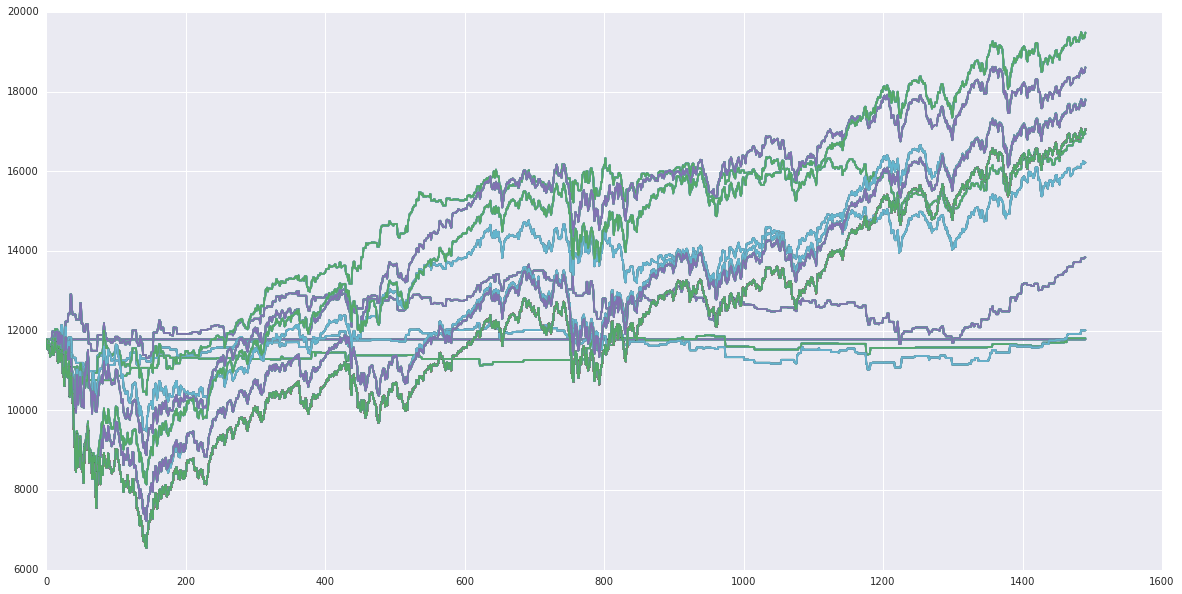

In [221]:
#1. threshold for long only strategy
indexrange = range(0,105,10) #range(1,55,5)
columnrange = range(0,105,10) #range(51,105,5)
optlist = pd.DataFrame(index = indexrange, columns = columnrange)
optlist = optlist.fillna(0) 
for i in indexrange:
    for j in columnrange:
        print i, j
        fig = plt.gcf()
        fig.set_size_inches(20, 10)
        optlist.loc[i,j] = thereshold(i/100.0, j/100.0, False)

optlist

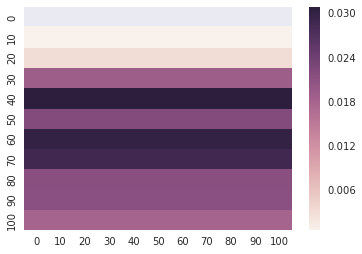

In [222]:
ax = sns.heatmap(optlist)

Long Only Strategy
sharp ratio of strategy is:  0.0222761966779
total returns of strategy is:  0.319305395551
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.00438148351011


0.022276196677920138

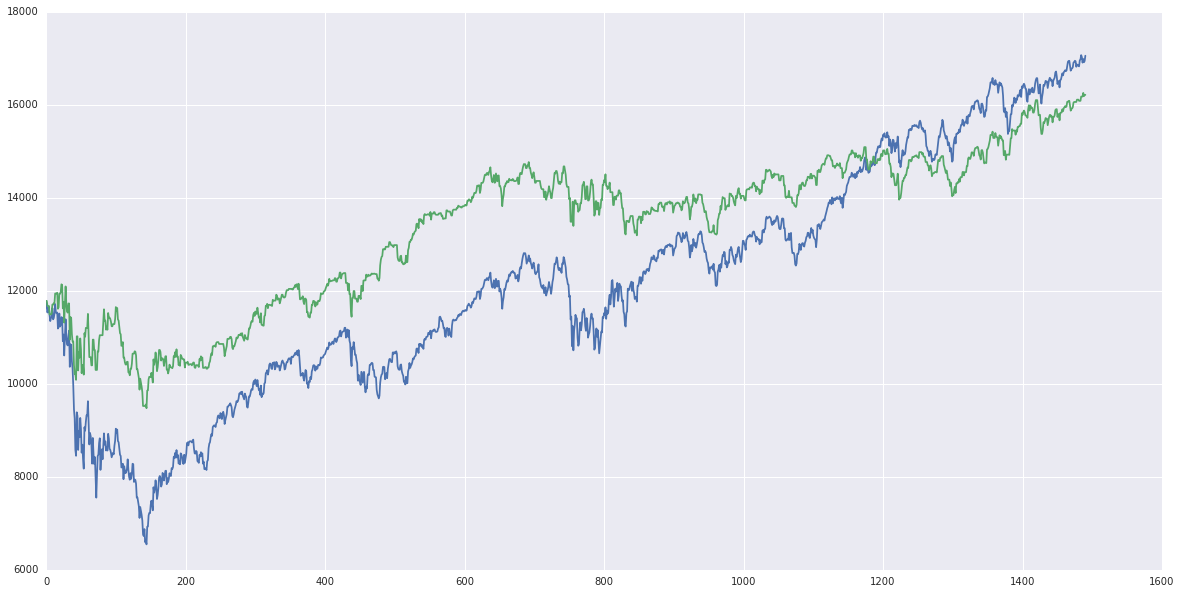

In [223]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(50/100.0, 50/100.0, False)

Long Only Strategy
sharp ratio of strategy is:  0.0309730467444
total returns of strategy is:  0.362899836376
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.00048090716738


0.030973046744400923

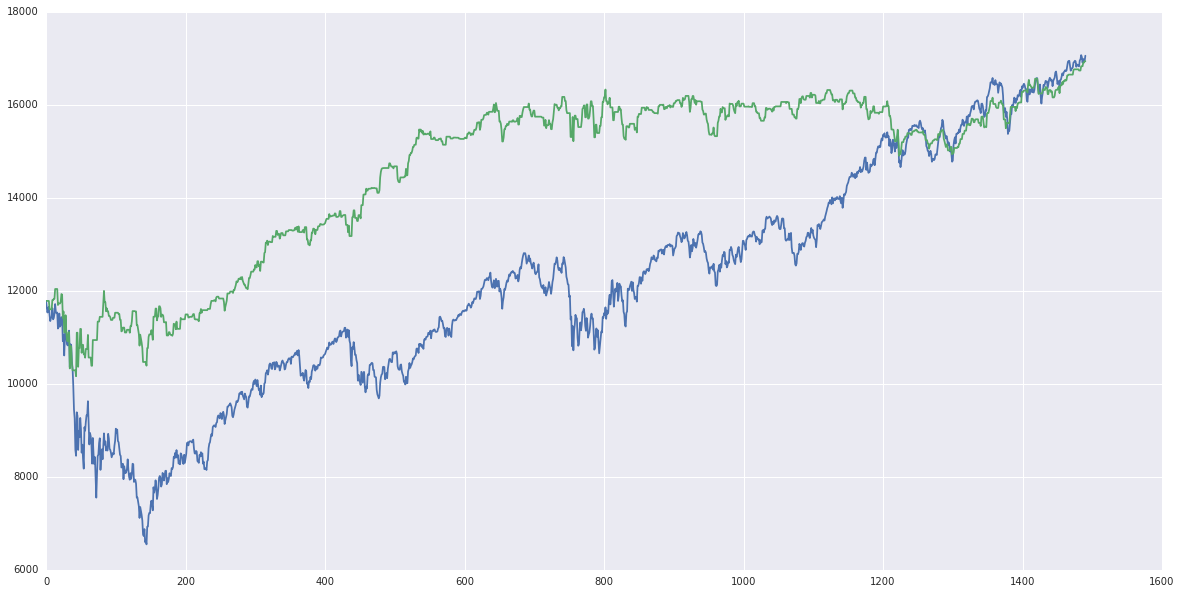

In [224]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(40/100.0, 100/100.0, False)

0 0
Long Short Strategy
sharp ratio of strategy is:  -0.0339356935928
total returns of strategy is:  -0.59067943278
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0260776571144
0 10
Long Short Strategy
sharp ratio of strategy is:  -0.0333531806983
total returns of strategy is:  -0.589177149512
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0259127550256
0 20
Long Short Strategy
sharp ratio of strategy is:  -0.0331007802812
total returns of strategy is:  -0.559115379698
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0258965845026
0 30
Long Short Strategy
sharp ratio of strategy is:  -0.0227108471089
total returns of strategy is:  -0.318696974615
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0211109735107
0 40
Long Short Strategy
sharp ratio of strategy is:  -0.000997782437748
total returns of strategy is:  -0.0100987468702
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.0135289578507
0 50
Long Short Strategy
sharp ratio of strategy is:  -0.00872956897042
total return

,0,10,20,30,40,50,60,70,80,90,100
0,-0.033936,-0.033353,-0.033101,-0.022711,-0.000998,-0.008730,0.020648,0.050238,0.025931,0.027567,NaN
10,-0.031476,-0.031476,-0.031228,-0.021312,-0.000714,-0.007730,0.018352,0.038762,0.015747,0.015757,0.000711
20,-0.028598,-0.028598,-0.028598,-0.019003,0.000803,-0.005321,0.018064,0.032488,0.013192,0.013029,0.003293
30,-0.006656,-0.006656,-0.006656,-0.006656,0.012608,0.008846,0.029098,0.039132,0.025449,0.025320,0.019098
40,0.025715,0.025715,0.025715,0.025715,0.025715,0.024103,0.038361,0.043630,0.034877,0.034801,0.030973
50,0.017672,0.017672,0.017672,0.017672,0.017672,0.017672,0.029912,0.033708,0.025851,0.025759,0.022276
60,0.037454,0.037454,0.037454,0.037454,0.037454,0.037454,0.037454,0.040410,0.033384,0.033307,0.030201
70,0.037402,0.037402,0.037402,0.037402,0.037402,0.037402,0.037402,0.037402,0.031397,0.031327,0.028746
80,0.024259,0.024259,0.024259,0.024259,0.024259,0.024259,0.024259,0.024259,0.024259,0.024180,0.021539
90,0.024034,0.024034,0.024034,0.024034,0.024034,0.024034,0.024034,0.024034,0.024034,0.024034,0.021394


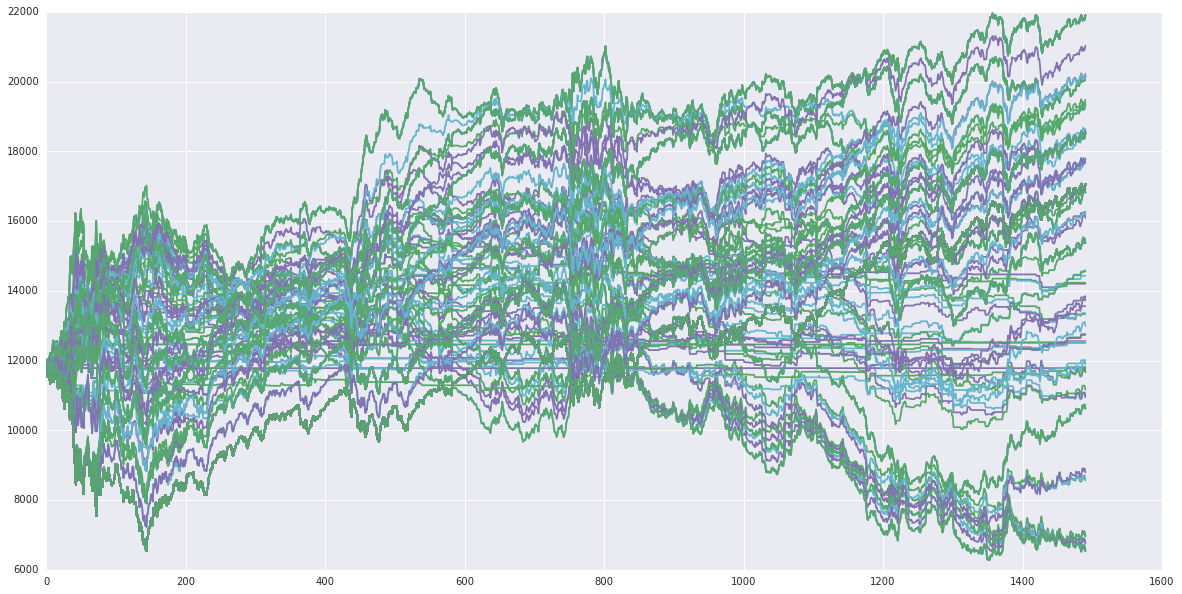

In [225]:
#2. threshold for long short strategy
indexrange = range(0,105,10) #range(1,55,5)
columnrange = range(0,105,10) #range(51,105,5)
optlist = pd.DataFrame(index = indexrange, columns = columnrange)
optlist = optlist.fillna(0) 
for i in indexrange:
    for j in columnrange:
        print i, j
        fig = plt.gcf()
        fig.set_size_inches(20, 10)
        optlist.loc[i,j] = thereshold(i/100.0, j/100.0, True)

optlist

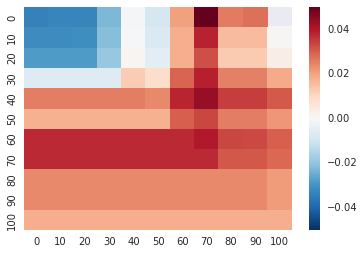

In [226]:
ax = sns.heatmap(optlist)

Long Short Strategy
sharp ratio of strategy is:  0.0176719864097
total returns of strategy is:  0.266052287207
sharp ratio of DJI is:  0.0182564218397
IR is:  -0.00523458460944


0.017671986409664012

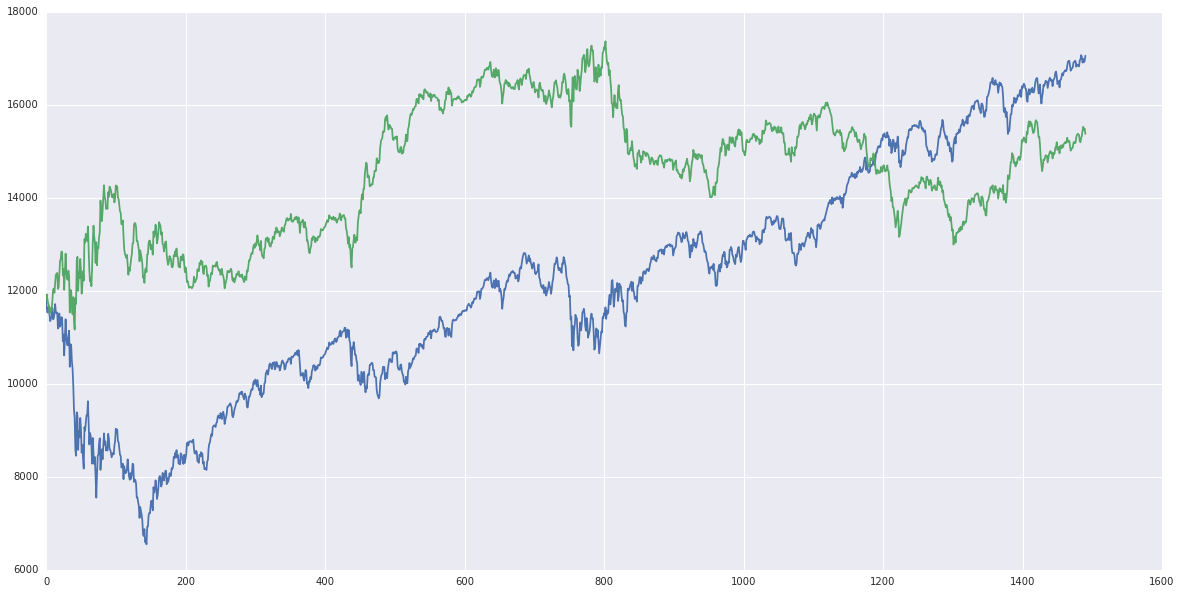

In [227]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(50/100.0, 50/100.0, True)

Long Short Strategy
sharp ratio of strategy is:  0.0436298363994
total returns of strategy is:  0.49649132493
sharp ratio of DJI is:  0.0182564218397
IR is:  0.00776007765375


0.04362983639941187

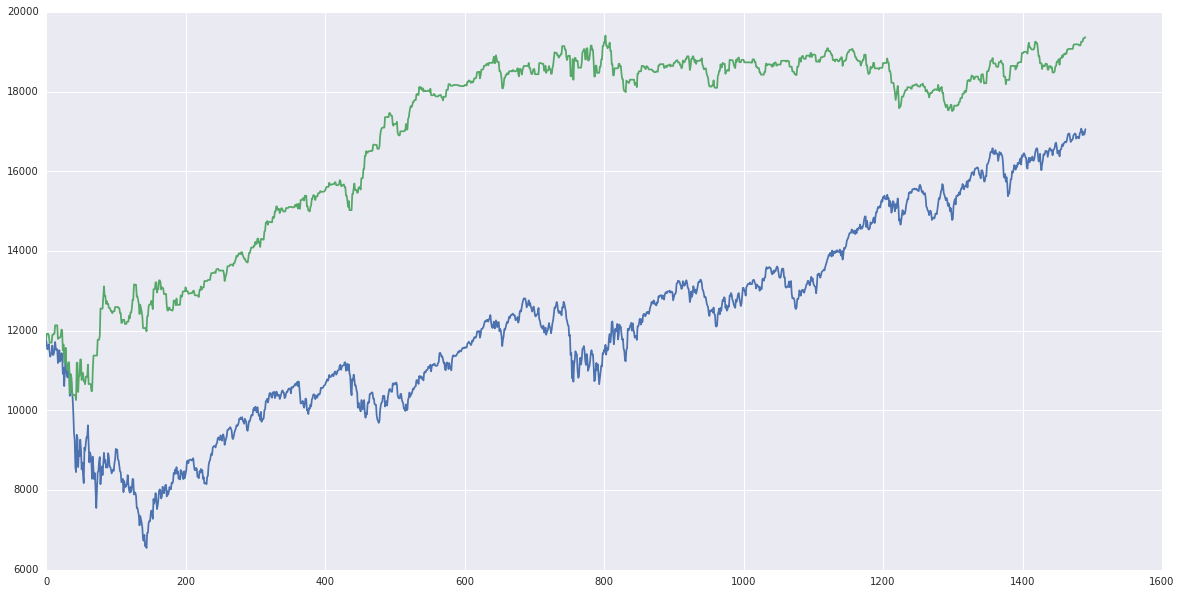

In [228]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(40/100.0, 70/100.0, True)

In [229]:
#backtesting

In [230]:
y_pred, y_prob = KNN()
y_prob = [item[0] for item in y_prob]

**************************************
Best parameters set found on development set:
{'n_neighbors': 7, 'algorithm': 'auto'}
KNN
ar is:  0.569416498994
er is:  0.430583501006
Type I error rate:  0.122736418511
Type II error rate:  0.307847082495
adaboost


In [231]:
price = pd.read_csv('../data/DJIA_table.csv').iloc[-len(y_prob):,][['Date','Close']]

In [232]:
date = list(price['Date'])
operation = list(y_prob)
price = list(price['Close'])

Long Only Strategy
sharp ratio of strategy is:  0.0436456483505
daily returns of strategy is:  0.000246990934477
total returns of strategy is:  0.122507503501
sharp ratio of DJI is:  0.0109224091291
IR is:  0.0204075308661


0.043645648350474124

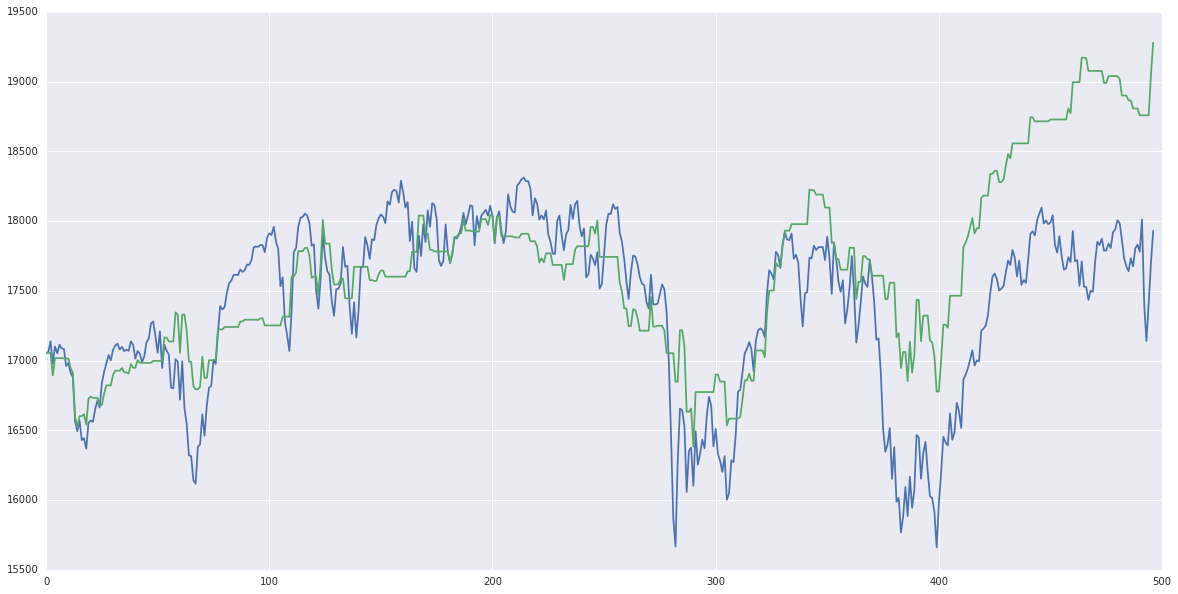

In [236]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(40/100.0, 40/100.0, False)

Long Short Strategy
sharp ratio of strategy is:  0.0404154202874
daily returns of strategy is:  0.000253710671794
total returns of strategy is:  0.12584049321
sharp ratio of DJI is:  0.0109224091291
IR is:  0.0179526619401


0.040415420287390737

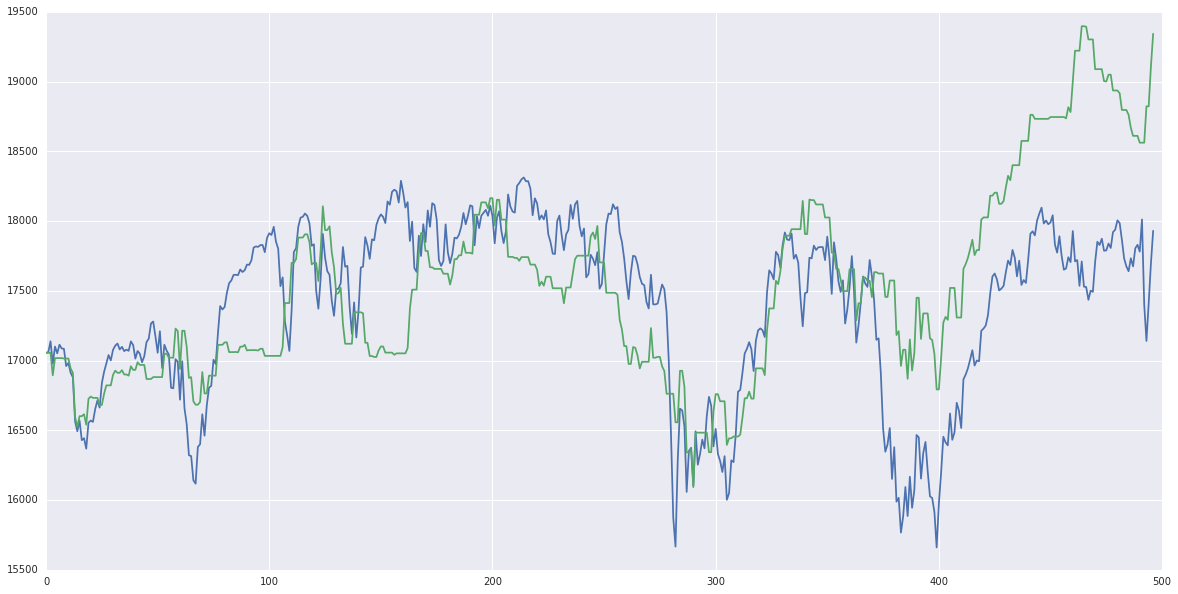

In [237]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
thereshold(40/100.0, 70/100.0, True)